In [1]:
import os

In [2]:
dicdir = 'DATA FROM your Directory'

In [3]:
os.listdir(dicdir)

['test', 'train']

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
%matplotlib inline

In [5]:
train_path = dicdir + '\\train\\'
test_path = dicdir + '\\test\\'

In [6]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [7]:
train_parasit_path = train_path + 'parasitized\\'

In [8]:
#List image of paratized cell
os.listdir(train_parasit_path)

['C100P61ThinF_IMG_20150918_144104_cell_162.png',
 'C100P61ThinF_IMG_20150918_144104_cell_163.png',
 'C100P61ThinF_IMG_20150918_144104_cell_164.png',
 'C100P61ThinF_IMG_20150918_144104_cell_165.png',
 'C100P61ThinF_IMG_20150918_144104_cell_166.png',
 'C100P61ThinF_IMG_20150918_144104_cell_167.png',
 'C100P61ThinF_IMG_20150918_144104_cell_168.png',
 'C100P61ThinF_IMG_20150918_144104_cell_169.png',
 'C100P61ThinF_IMG_20150918_144104_cell_170.png',
 'C100P61ThinF_IMG_20150918_144104_cell_171.png',
 'C100P61ThinF_IMG_20150918_144348_cell_138.png',
 'C100P61ThinF_IMG_20150918_144348_cell_139.png',
 'C100P61ThinF_IMG_20150918_144348_cell_140.png',
 'C100P61ThinF_IMG_20150918_144348_cell_141.png',
 'C100P61ThinF_IMG_20150918_144348_cell_142.png',
 'C100P61ThinF_IMG_20150918_144348_cell_143.png',
 'C100P61ThinF_IMG_20150918_144823_cell_157.png',
 'C100P61ThinF_IMG_20150918_144823_cell_158.png',
 'C100P61ThinF_IMG_20150918_144823_cell_159.png',
 'C100P61ThinF_IMG_20150918_144823_cell_160.png',


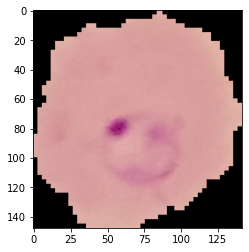

In [9]:
#Show 1 image of paratized cell
plt.imshow(imread(train_parasit_path+'C100P61ThinF_IMG_20150918_144104_cell_162.png'))

In [10]:
train_uninfected_path = train_path + 'uninfected\\'

In [11]:
#List image of uninfected cell
os.listdir(train_uninfected_path)

['C100P61ThinF_IMG_20150918_144104_cell_128.png',
 'C100P61ThinF_IMG_20150918_144104_cell_131.png',
 'C100P61ThinF_IMG_20150918_144104_cell_144.png',
 'C100P61ThinF_IMG_20150918_144104_cell_21.png',
 'C100P61ThinF_IMG_20150918_144104_cell_25.png',
 'C100P61ThinF_IMG_20150918_144104_cell_48.png',
 'C100P61ThinF_IMG_20150918_144104_cell_65.png',
 'C100P61ThinF_IMG_20150918_144348_cell_120.png',
 'C100P61ThinF_IMG_20150918_144348_cell_125.png',
 'C100P61ThinF_IMG_20150918_144348_cell_131.png',
 'C100P61ThinF_IMG_20150918_144348_cell_2.png',
 'C100P61ThinF_IMG_20150918_144348_cell_25.png',
 'C100P61ThinF_IMG_20150918_144348_cell_40.png',
 'C100P61ThinF_IMG_20150918_144348_cell_71.png',
 'C100P61ThinF_IMG_20150918_144823_cell_126.png',
 'C100P61ThinF_IMG_20150918_144823_cell_127.png',
 'C100P61ThinF_IMG_20150918_144823_cell_139.png',
 'C100P61ThinF_IMG_20150918_144823_cell_142.png',
 'C100P61ThinF_IMG_20150918_144823_cell_151.png',
 'C100P61ThinF_IMG_20150918_144823_cell_21.png',
 'C100P61T

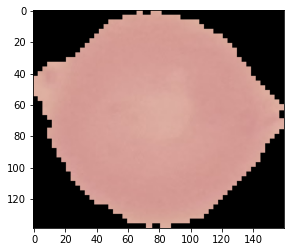

In [12]:
#Show 1 image of uninfected cell
plt.imshow(imread(train_uninfected_path+'C100P61ThinF_IMG_20150918_144104_cell_128.png'))

In [13]:
#Define image dimention based on uninfected image
dic1_uninfect =[]
dic2_uninfect =[]
for img_name in os.listdir(train_uninfected_path):
    img = imread(train_uninfected_path+img_name)
    width1,height1,color = img.shape
    dic1_uninfect.append(width1)
    dic2_uninfect.append(height1)

In [14]:
print(str(np.mean(dic1_uninfect)) + '\n' + str(np.mean(dic2_uninfect)))

131.64820899110507
131.4041990544114


In [15]:
image_shape = (130,130,3)

In [16]:
#Data Processing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              zoom_range=0.1,
                              shear_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest')

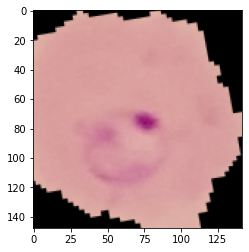

In [18]:
plt.imshow(image_gen.random_transform(imread(train_parasit_path+'C100P61ThinF_IMG_20150918_144104_cell_162.png')))

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten,Dropout

In [22]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
early_stopping = EarlyStopping(monitor='val_loss',patience=1)

In [25]:
train_gen = image_gen.flow_from_directory(train_path,
                                          target_size=image_shape[:2],
                                          color_mode='rgb',
                                          batch_size=16,
                                          class_mode='binary')

Found 24958 images belonging to 2 classes.


In [26]:
test_gen = image_gen.flow_from_directory(test_path,
                                          target_size=image_shape[:2],
                                          color_mode='rgb',
                                          batch_size=16,
                                          class_mode='binary',
                                          shuffle=False)

Found 2600 images belonging to 2 classes.


In [27]:
train_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [28]:
result = model.fit_generator(train_gen,epochs=20,
                            validation_data=test_gen,
                            callbacks=[early_stopping])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
1560/1560 [==============================] - 1018s 652ms/step - loss: 0.4231 - accuracy: 0.8760 - val_loss: 0.2308 - val_accuracy: 0.9246
Epoch 2/20
1560/1560 [==============================] - 1018s 652ms/step - loss: 0.2337 - accuracy: 0.9254 - val_loss: 0.1777 - val_accuracy: 0.9392
Epoch 3/20
1560/1560 [==============================] - 1048s 672ms/step - loss: 0.1935 - accuracy: 0.9399 - val_loss: 0.1825 - val_accuracy: 0.9404


In [29]:
pd.DataFrame(model.history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.423074,0.875952,0.230825,0.924615
1,0.233675,0.925355,0.177715,0.939231
2,0.193488,0.939939,0.182454,0.940385


In [30]:
from tensorflow.keras.preprocessing import image

In [31]:
y_pred = model.predict_generator(test_gen)

Instructions for updating:
Please use Model.predict, which supports generators.


In [32]:
predictions = y_pred > 0.5

In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
print(classification_report(test_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1300
           1       0.92      0.96      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



In [35]:
confusion_matrix(test_gen.classes,predictions)

array([[1195,  105],
       [  55, 1245]], dtype=int64)

In [36]:
os.listdir(test_path+'\\parasitized')

['C100P61ThinF_IMG_20150918_144348_cell_144.png',
 'C100P61ThinF_IMG_20150918_145422_cell_165.png',
 'C100P61ThinF_IMG_20150918_145609_cell_145.png',
 'C100P61ThinF_IMG_20150918_145609_cell_149.png',
 'C100P61ThinF_IMG_20150918_145609_cell_150.png',
 'C100P61ThinF_IMG_20150918_145938_cell_175.png',
 'C100P61ThinF_IMG_20150918_150041_cell_148.png',
 'C101P62ThinF_IMG_20150918_151006_cell_64.png',
 'C101P62ThinF_IMG_20150918_151239_cell_80.png',
 'C101P62ThinF_IMG_20150918_151239_cell_88.png',
 'C101P62ThinF_IMG_20150918_151239_cell_99.png',
 'C101P62ThinF_IMG_20150918_151335_cell_58.png',
 'C101P62ThinF_IMG_20150918_151335_cell_66.png',
 'C101P62ThinF_IMG_20150918_151507_cell_60.png',
 'C101P62ThinF_IMG_20150918_151507_cell_63.png',
 'C101P62ThinF_IMG_20150918_151507_cell_65.png',
 'C101P62ThinF_IMG_20150918_151507_cell_70.png',
 'C101P62ThinF_IMG_20150918_151507_cell_73.png',
 'C101P62ThinF_IMG_20150918_151507_cell_75.png',
 'C101P62ThinF_IMG_20150918_151942_cell_63.png',
 'C101P62Thin

In [37]:
gambar_kanker = test_path+'\\parasitized\\C100P61ThinF_IMG_20150918_145422_cell_165.png'

In [38]:
my_image = image.load_img(gambar_kanker,target_size=image_shape)

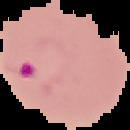

In [39]:
my_image

In [40]:
my_image = image.img_to_array(my_image)

In [41]:
my_image = my_image.reshape(1,130,130,3)

In [42]:
model.predict(my_image)

array([[2.43241e-06]], dtype=float32)

In [43]:
test_gen.class_indices

{'parasitized': 0, 'uninfected': 1}